In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csc_matrix


N=5
t=1
t=t/(N-1)
S0=100
K=98
r=0.01
sigma=0.4
u=np.exp(sigma*np.sqrt(t))
d=1/u

p=(np.exp(-r*t)-d)/(u-d)
stock_prices=csc_matrix((N,N))
option_prices=csc_matrix((N,N))

c:\Users\adib-\anaconda3\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
c:\Users\adib-\anaconda3\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


  (0, 0)	15.651893735074287
  (1, 0)	5.169554201231045
  (2, 0)	0.39224411893132055
  (3, 0)	0.0
  (4, 0)	0.0
  (1, 1)	28.868523201533833
  (2, 1)	11.18194072866753
  (3, 1)	0.8857134061662616
  (4, 1)	0.0
  (2, 2)	51.182469764127035
  (3, 2)	24.14027581601698
  (4, 2)	2.0
  (3, 3)	84.2118800390509
  (4, 3)	51.182469764127035
  (4, 4)	124.55409284924676


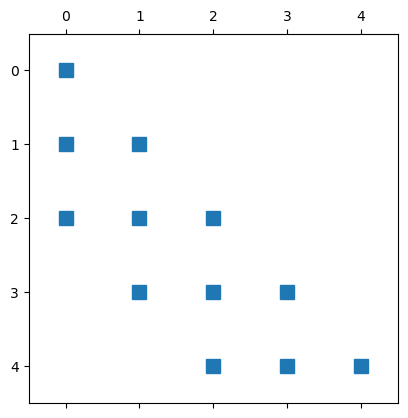

In [4]:
stock_prices[0,0]=S0

for i in range (1,N):
    M=i+1
    stock_prices[i,0]=d*stock_prices[i-1,0]
    for j in range (1,M):
        stock_prices[i,j]=u*stock_prices[i-1,j-1]

expiration=stock_prices[-1,:].toarray()-K
expiration=np.where(expiration>=0,expiration,0)


option_prices[-1,:]=expiration


for i in range(N - 2,-1,-1):
    for j in range(i+1):
        option_prices[i,j]=np.exp(-r * t) * ((1-p) * option_prices[i+1,j] + p * option_prices[i+1,j+1])
        if stock_prices[i,j]-K>option_prices[i,j]:
            option_prices[i,j]=stock_prices[i,j]-K
        




plt.spy(option_prices)
print(option_prices)